## Post-AENN Regression Framework

- 2 activation functions: ReLU and sigmoid
- 3 depths of networks: shallow, medium, deep
- 4 numbers of training epochs: 10, 100, 1000, 1000
- Gives 24 different versions of autoencoder neural network-output features

For each model:
1. Learn least squares weights
2. Predict $\hat{y}$ from learned weights
3. Calculate MSE 
4. Compare results

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import label data
FINAL_DATA = os.path.join('..', 'data', 'final')
y_df = pd.read_csv(os.path.join(FINAL_DATA, 'labels.csv'), header=None).to_numpy()
y_df.shape

(10000, 1)

In [2]:
# Get list of filenames to iterate through
AENN_DATA_PATH = os.path.join('..', 'data', 'aenn_output')
aenn_outputs = sorted([f for f in os.listdir(AENN_DATA_PATH) if f.endswith('csv')])
aenn_outputs

['compressed_relu_deep_10.csv',
 'compressed_relu_deep_100.csv',
 'compressed_relu_deep_1000.csv',
 'compressed_relu_deep_10000.csv',
 'compressed_relu_medium_10.csv',
 'compressed_relu_medium_100.csv',
 'compressed_relu_medium_1000.csv',
 'compressed_relu_medium_10000.csv',
 'compressed_relu_shallow_10.csv',
 'compressed_relu_shallow_100.csv',
 'compressed_relu_shallow_1000.csv',
 'compressed_relu_shallow_10000.csv',
 'compressed_relu_sigmoidOut_100.csv',
 'compressed_sigmoid_deep_10.csv',
 'compressed_sigmoid_deep_100.csv',
 'compressed_sigmoid_deep_1000.csv',
 'compressed_sigmoid_deep_10000.csv',
 'compressed_sigmoid_medium_10.csv',
 'compressed_sigmoid_medium_100.csv',
 'compressed_sigmoid_medium_1000.csv',
 'compressed_sigmoid_medium_10000.csv',
 'compressed_sigmoid_shallow_10.csv',
 'compressed_sigmoid_shallow_100.csv',
 'compressed_sigmoid_shallow_1000.csv',
 'compressed_sigmoid_shallow_10000.csv',
 'compressed_sigmoid_symmetric_100.csv']

In [3]:
# Using pseudoinverse of X when p >> n
def get_ls_w(x, y):
    
    # Calculate SVD of x
    u, sigma, vt = np.linalg.svd(x)
    
    # Calculate pseudoinverse of sigma
    k = x.shape[1]
    sigma_psinv = np.zeros((vt.shape[0], u.shape[0])) 
    sigma_psinv[:k, :k] = np.diag(1 / sigma[:k])
    
    # Calculate least squares weights
    w = np.linalg.multi_dot([
        vt.T, sigma_psinv, u.T, y
    ])
    
    return w    

In [4]:
results = pd.DataFrame()

for idx, i in enumerate(aenn_outputs):
    
    # Parse model info
    _, activation_fn, layers, epochs = i.replace('.csv', '').split('_')
    print(f'{idx + 1} of {len(aenn_outputs)}: Evaluatating AENN model with {activation_fn} using {layers} layers and {epochs} epochs')
    
    # Import feature data 
    x = pd.read_csv(os.path.join(AENN_DATA_PATH, i), header=None).to_numpy()
          
    # Learn least squares weights 
    w = get_ls_w(x, y_df)
    
    # Calculate predicted y
    y_hat = np.matmul(x, w)
    
    # Calculate mean squared error
    mse = ((y_df - y_hat) ** 2).mean()
    
    # Store results
    results = results.append({
        'activation': activation_fn,
        'layers': layers,
        'num_epochs': epochs,
        'mse': mse
    }, ignore_index=True)
    
order = ['activation', 'layers', 'num_epochs', 'mse']
results = results[order]

1 of 26: Evaluatating AENN model with relu using deep layers and 10 epochs
2 of 26: Evaluatating AENN model with relu using deep layers and 100 epochs
3 of 26: Evaluatating AENN model with relu using deep layers and 1000 epochs
4 of 26: Evaluatating AENN model with relu using deep layers and 10000 epochs
5 of 26: Evaluatating AENN model with relu using medium layers and 10 epochs
6 of 26: Evaluatating AENN model with relu using medium layers and 100 epochs
7 of 26: Evaluatating AENN model with relu using medium layers and 1000 epochs
8 of 26: Evaluatating AENN model with relu using medium layers and 10000 epochs
9 of 26: Evaluatating AENN model with relu using shallow layers and 10 epochs
10 of 26: Evaluatating AENN model with relu using shallow layers and 100 epochs
11 of 26: Evaluatating AENN model with relu using shallow layers and 1000 epochs
12 of 26: Evaluatating AENN model with relu using shallow layers and 10000 epochs
13 of 26: Evaluatating AENN model with relu using sigmoidOu

In [5]:
results

,activation,layers,num_epochs,mse
0,relu,deep,10,1074.289408
1,relu,deep,100,1074.289408
2,relu,deep,1000,1074.289408
3,relu,deep,10000,1074.289408
4,relu,medium,10,1742.411749
5,relu,medium,100,1742.411749
6,relu,medium,1000,1742.411749
7,relu,medium,10000,1742.411749
8,relu,shallow,10,1732.283164
9,relu,shallow,100,1732.283164


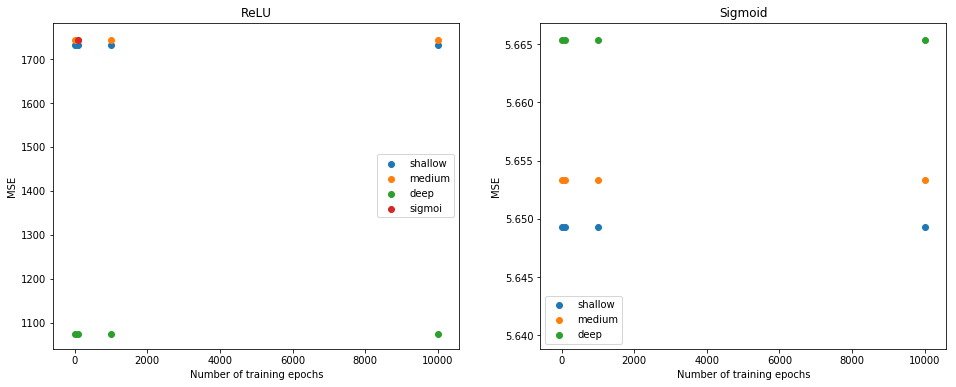

In [11]:
# Plot results
fig, ax = plt.subplots(1, 2, sharey=False, figsize=(16,6))

# for idx, i in enumerate(['relu', 'sigmoid']):
#     for j in ('shallow', 'medium', 'deep'):
#         x = np.array([10, 100, 1000, 10000])
#         print(results[(results['activation'] == i) & (results['layers'] == j)]['mse'])
#         y = results[(results['activation'] == i) & (results['layers'] == j)]['mse']
#         ax[idx].plot(x, y)
    
x = np.array([10, 100, 1000, 10000])
ax[0].set_title('ReLU')
ax[0].set_xlabel('Number of training epochs')
ax[0].set_ylabel('MSE')
ax[0].scatter(x, results[(results['activation'] == 'relu') & (results['layers'] == 'shallow')]['mse'].to_numpy(),
           label='shallow')
ax[0].scatter(x, results[(results['activation'] == 'relu') & (results['layers'] == 'medium')]['mse'].to_numpy(),
           label='medium')
ax[0].scatter(x, results[(results['activation'] == 'relu') & (results['layers'] == 'deep')]['mse'].to_numpy(),
           label='deep')
ax[0].scatter(np.array([100]), results[(results['activation'] == 'relu') & (results['layers'] == 'sigmoidOut')]['mse'].to_numpy(),
           label='sigmoid_out')
ax[0].legend()

ax[1].set_title('Sigmoid')
ax[1].set_xlabel('Number of training epochs')
ax[1].set_ylabel('MSE')
ax[1].scatter(x, results[(results['activation'] == 'sigmoid') & (results['layers'] == 'shallow')]['mse'].to_numpy(),
           label='shallow')
ax[1].scatter(x, results[(results['activation'] == 'sigmoid') & (results['layers'] == 'medium')]['mse'].to_numpy(),
           label='medium')
ax[1].scatter(x, results[(results['activation'] == 'sigmoid') & (results['layers'] == 'deep')]['mse'].to_numpy(),
           label='deep')
ax[1].scatter(x, results[(results['activation'] == 'sigmoid') & (results['layers'] == 'deep')]['mse'].to_numpy(),
           label='deep')
ax[1].legend()

plt.savefig(os.path.join('..', 'images', 'aenn_results_plot.png'))
plt.show()